# Data Preprocessing

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://www.kaggle.com/jboysen/mri-and-alzheimers

In [2]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

## Data Preprocessing

#### Data Cleaning: Column Names

In [4]:
df.columns = ['Subjec_ID', 'MRI_ID', 'Group', 'Visit', 'MR_Delay', 'Gender', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df.head()

,Subjec_ID,MRI_ID,Group,Visit,MR_Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Subjec_ID  373 non-null    object 
 1   MRI_ID     373 non-null    object 
 2   Group      373 non-null    object 
 3   Visit      373 non-null    int64  
 4   MR_Delay   373 non-null    int64  
 5   Gender     373 non-null    object 
 6   Hand       373 non-null    object 
 7   Age        373 non-null    int64  
 8   EDUC       373 non-null    int64  
 9   SES        354 non-null    float64
 10  MMSE       371 non-null    float64
 11  CDR        373 non-null    float64
 12  eTIV       373 non-null    int64  
 13  nWBV       373 non-null    float64
 14  ASF        373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


#### What about Missing Values?

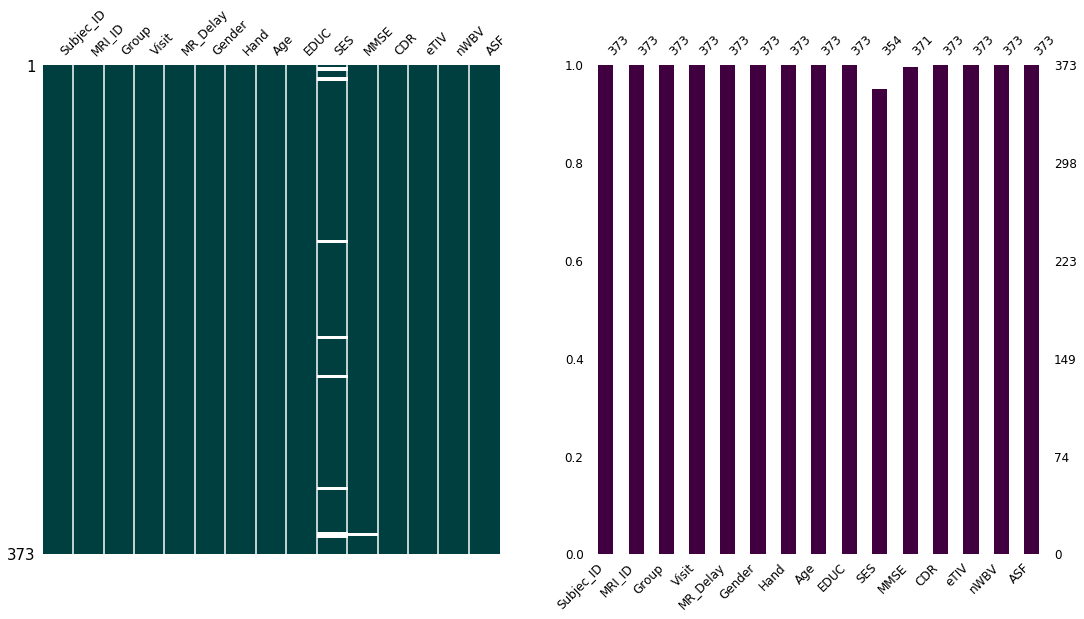

In [6]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

In [7]:
def dfmiss (df):

    count = df.isnull().sum()

    df_miss = pd.DataFrame(index = df.columns, data =
                     {'data_type': df.dtypes,
                      'unique_values': df.nunique(),
                      'have_null?': df.isnull().any(),
                      'how many?' : count,
                      '%' : count/df.shape[0]*100 })
    return df_miss

dfmiss(df)

,data_type,unique_values,have_null?,how many?,%
Subjec_ID,object,150,False,0,0.000000
MRI_ID,object,373,False,0,0.000000
Group,object,3,False,0,0.000000
Visit,int64,5,False,0,0.000000
MR_Delay,int64,201,False,0,0.000000
Gender,object,2,False,0,0.000000
Hand,object,1,False,0,0.000000
Age,int64,39,False,0,0.000000
EDUC,int64,12,False,0,0.000000
SES,float64,5,True,19,5.093834


##### Which columns contain missing values?

In [8]:
d = dfmiss(df)
missing_val_col = d[d['have_null?'] == True].index.to_list()
missing_val_col

['SES', 'MMSE']

#### Handling Missing Values: 

#### Let's impute the SES Nan data as another label

In [9]:
df.SES = df.SES.replace(np.nan, 0.0)

#### Let's impute randomly sampled data in MMSE

In [10]:
def impute_nan(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample
    
impute_nan(df, 'MMSE')

Subjec_ID    0
MRI_ID       0
Group        0
Visit        0
MR_Delay     0
Gender       0
Hand         0
Age          0
EDUC         0
SES          0
MMSE         0
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

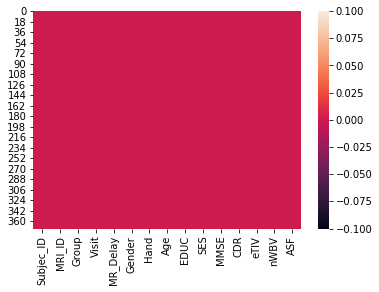

In [11]:
sns.heatmap(pd.isnull(df))
df.isnull().sum()

##### **Cool! We got rid of the missin values now!**

#### Encoding Categorical Features
##### Ordinal Encoding of df.Gender

In [12]:
df.Gender.unique()
dictionary = {'F': 1, 'M': 2}
df['Gender']= df['Gender'].map(dictionary)
df.head()

,Subjec_ID,MRI_ID,Group,Visit,MR_Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,2,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,2,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,2,R,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,2,R,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,2,R,80,12,0.0,22.0,0.5,1698,0.701,1.034


##### Ordinal Encoding of df.Hand

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder_hand=LabelEncoder()
encoder_hand.fit(df.Hand.values)

encoder_hand.transform(df.Hand.values)
df[['Hand']]=encoder_hand.transform(df.Hand.values)
list(encoder_hand.classes_)

['R']

##### Ordinal Encoding of df.CDR, the Target

In [14]:
df.CDR.unique()
dictionary = {0.0: 0, 0.5:1, 1.0:1, 2.0:1}
df['CDR']= df['CDR'].map(dictionary)
df.head()

,Subjec_ID,MRI_ID,Group,Visit,MR_Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,2,0,87,14,2.0,27.0,0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,2,0,88,14,2.0,30.0,0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,2,0,75,12,0.0,23.0,1,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,2,0,76,12,0.0,28.0,1,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,2,0,80,12,0.0,22.0,1,1698,0.701,1.034


#### Removing Unimpactful Columns

In [15]:
df.drop('Subjec_ID', axis=1, inplace = True)
df = df. drop('MRI_ID', axis=1)
df = df. drop('Group', axis=1)
df = df. drop('Hand', axis=1)
df = df. drop('MR_Delay', axis=1)

In [16]:
df.head()

,Visit,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,2,87,14,2.0,27.0,0,1987,0.696,0.883
1,2,2,88,14,2.0,30.0,0,2004,0.681,0.876
2,1,2,75,12,0.0,23.0,1,1678,0.736,1.046
3,2,2,76,12,0.0,28.0,1,1738,0.713,1.010
4,3,2,80,12,0.0,22.0,1,1698,0.701,1.034


In [17]:
df.to_csv('preprocessed_oasis_longitudinal.csv')